In [ ]:
"""機器故障預測數據集分析報告"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os
from pathlib import Path

# 下載並安裝中文字體
!wget -q https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf

# 註冊並設定中文字型
font_path = 'NotoSansCJKtc-Regular.otf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# 設定 matplotlib 使用該字型
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 創建保存圖片的目錄
output_dir = Path('report_images')
output_dir.mkdir(exist_ok=True)

# 讀取數據
df = pd.read_csv("machine_failure_cleaned.csv")

"""# 1. 數據集基本分析"""

# 生成數據集基本信息報告
with open('report_content.txt', 'w', encoding='utf-8') as f:
    f.write("機器故障預測數據集分析報告\n")
    f.write("="*50 + "\n\n")

    f.write("1. 數據集概述\n")
    f.write("-"*30 + "\n")
    f.write(f"總樣本數: {df.shape[0]}\n")
    f.write(f"特徵數量: {df.shape[1]}\n\n")

    f.write("2. 特徵說明\n")
    f.write("-"*30 + "\n")
    f.write("數值型特徵：\n")
    f.write("- 轉速 (rpm)：機器運轉速度\n")
    f.write("- 扭矩 (Nm)：機器輸出扭矩\n")
    f.write("- 工具磨損 (分鐘)：工具使用時間\n\n")

    f.write("類別型特徵：\n")
    f.write("- TWF：工具磨損故障\n")
    f.write("- HDF：散熱故障\n")
    f.write("- PWF：功率故障\n")
    f.write("- OSF：過應力故障\n")
    f.write("- Machine failure：機器故障（目標變量）\n\n")

"""# 2. 目標變量分析"""

# 目標變量分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Machine failure')
plt.title('機器故障分布情況')
plt.xlabel('是否故障')
plt.ylabel('數量')
plt.savefig('report_images/target_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

# 更新報告內容
with open('report_content.txt', 'a', encoding='utf-8') as f:
    f.write("3. 目標變量分析\n")
    f.write("-"*30 + "\n")
    f.write(f"故障樣本比例: {df['Machine failure'].mean():.2%}\n")
    f.write(f"正常樣本比例: {(1 - df['Machine failure'].mean()):.2%}\n\n")

"""# 3. 特徵分析"""

# 數值型特徵分布
numeric_cols = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
numeric_names = ['轉速', '扭矩', '工具磨損']

for col, name in zip(numeric_cols, numeric_names):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f'{name}分布圖')
    plt.xlabel(name)
    plt.ylabel('頻率')
    plt.savefig(f'report_images/{name}_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()

# 更新報告內容
with open('report_content.txt', 'a', encoding='utf-8') as f:
    f.write("4. 數值型特徵分析\n")
    f.write("-"*30 + "\n")
    for col, name in zip(numeric_cols, numeric_names):
        f.write(f"{name}統計：\n")
        f.write(f"- 平均值: {df[col].mean():.2f}\n")
        f.write(f"- 標準差: {df[col].std():.2f}\n")
        f.write(f"- 最小值: {df[col].min():.2f}\n")
        f.write(f"- 最大值: {df[col].max():.2f}\n\n")

"""# 4. 相關性分析"""

# 計算相關性矩陣
corr_matrix = df.corr(numeric_only=True)

# 繪製相關性熱力圖
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('特徵相關性熱力圖')
plt.tight_layout()
plt.savefig('report_images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# 更新報告內容
with open('report_content.txt', 'a', encoding='utf-8') as f:
    f.write("5. 特徵相關性分析\n")
    f.write("-"*30 + "\n")
    f.write("主要發現：\n")
    f.write("- 轉速與扭矩呈現負相關關係\n")
    f.write("- 工具磨損與故障率呈現正相關關係\n")
    f.write("- 各類故障之間存在一定的相關性\n\n")

"""# 5. 故障類型分析"""

# 故障類型分布
fault_cols = ['TWF', 'HDF', 'PWF', 'OSF']
fault_names = ['工具磨損故障', '散熱故障', '功率故障', '過應力故障']

plt.figure(figsize=(12, 6))
fault_counts = df[fault_cols].sum()
plt.bar(fault_names, fault_counts)
plt.title('各類型故障分布')
plt.xticks(rotation=45)
plt.ylabel('故障次數')
plt.tight_layout()
plt.savefig('report_images/fault_types.png', dpi=300, bbox_inches='tight')
plt.close()

# 更新報告內容
with open('report_content.txt', 'a', encoding='utf-8') as f:
    f.write("6. 故障類型分析\n")
    f.write("-"*30 + "\n")
    for col, name in zip(fault_cols, fault_names):
        f.write(f"{name}發生比例: {df[col].mean():.2%}\n")
    f.write("\n")

"""# 6. 結論與建議"""

# 更新報告內容
with open('report_content.txt', 'a', encoding='utf-8') as f:
    f.write("7. 結論與建議\n")
    f.write("-"*30 + "\n")
    f.write("主要結論：\n")
    f.write("1. 數據集呈現明顯的不平衡性，需要特別處理\n")
    f.write("2. 工具磨損是影響機器故障的重要因素\n")
    f.write("3. 各類故障之間存在關聯性，可以考慮特徵交互\n\n")

    f.write("建議：\n")
    f.write("1. 使用標準化處理數值型特徵\n")
    f.write("2. 考慮使用過採樣或欠採樣處理不平衡問題\n")
    f.write("3. 可以嘗試特徵交互來提升模型性能\n")
    f.write("4. 建議使用集成學習方法進行建模\n")

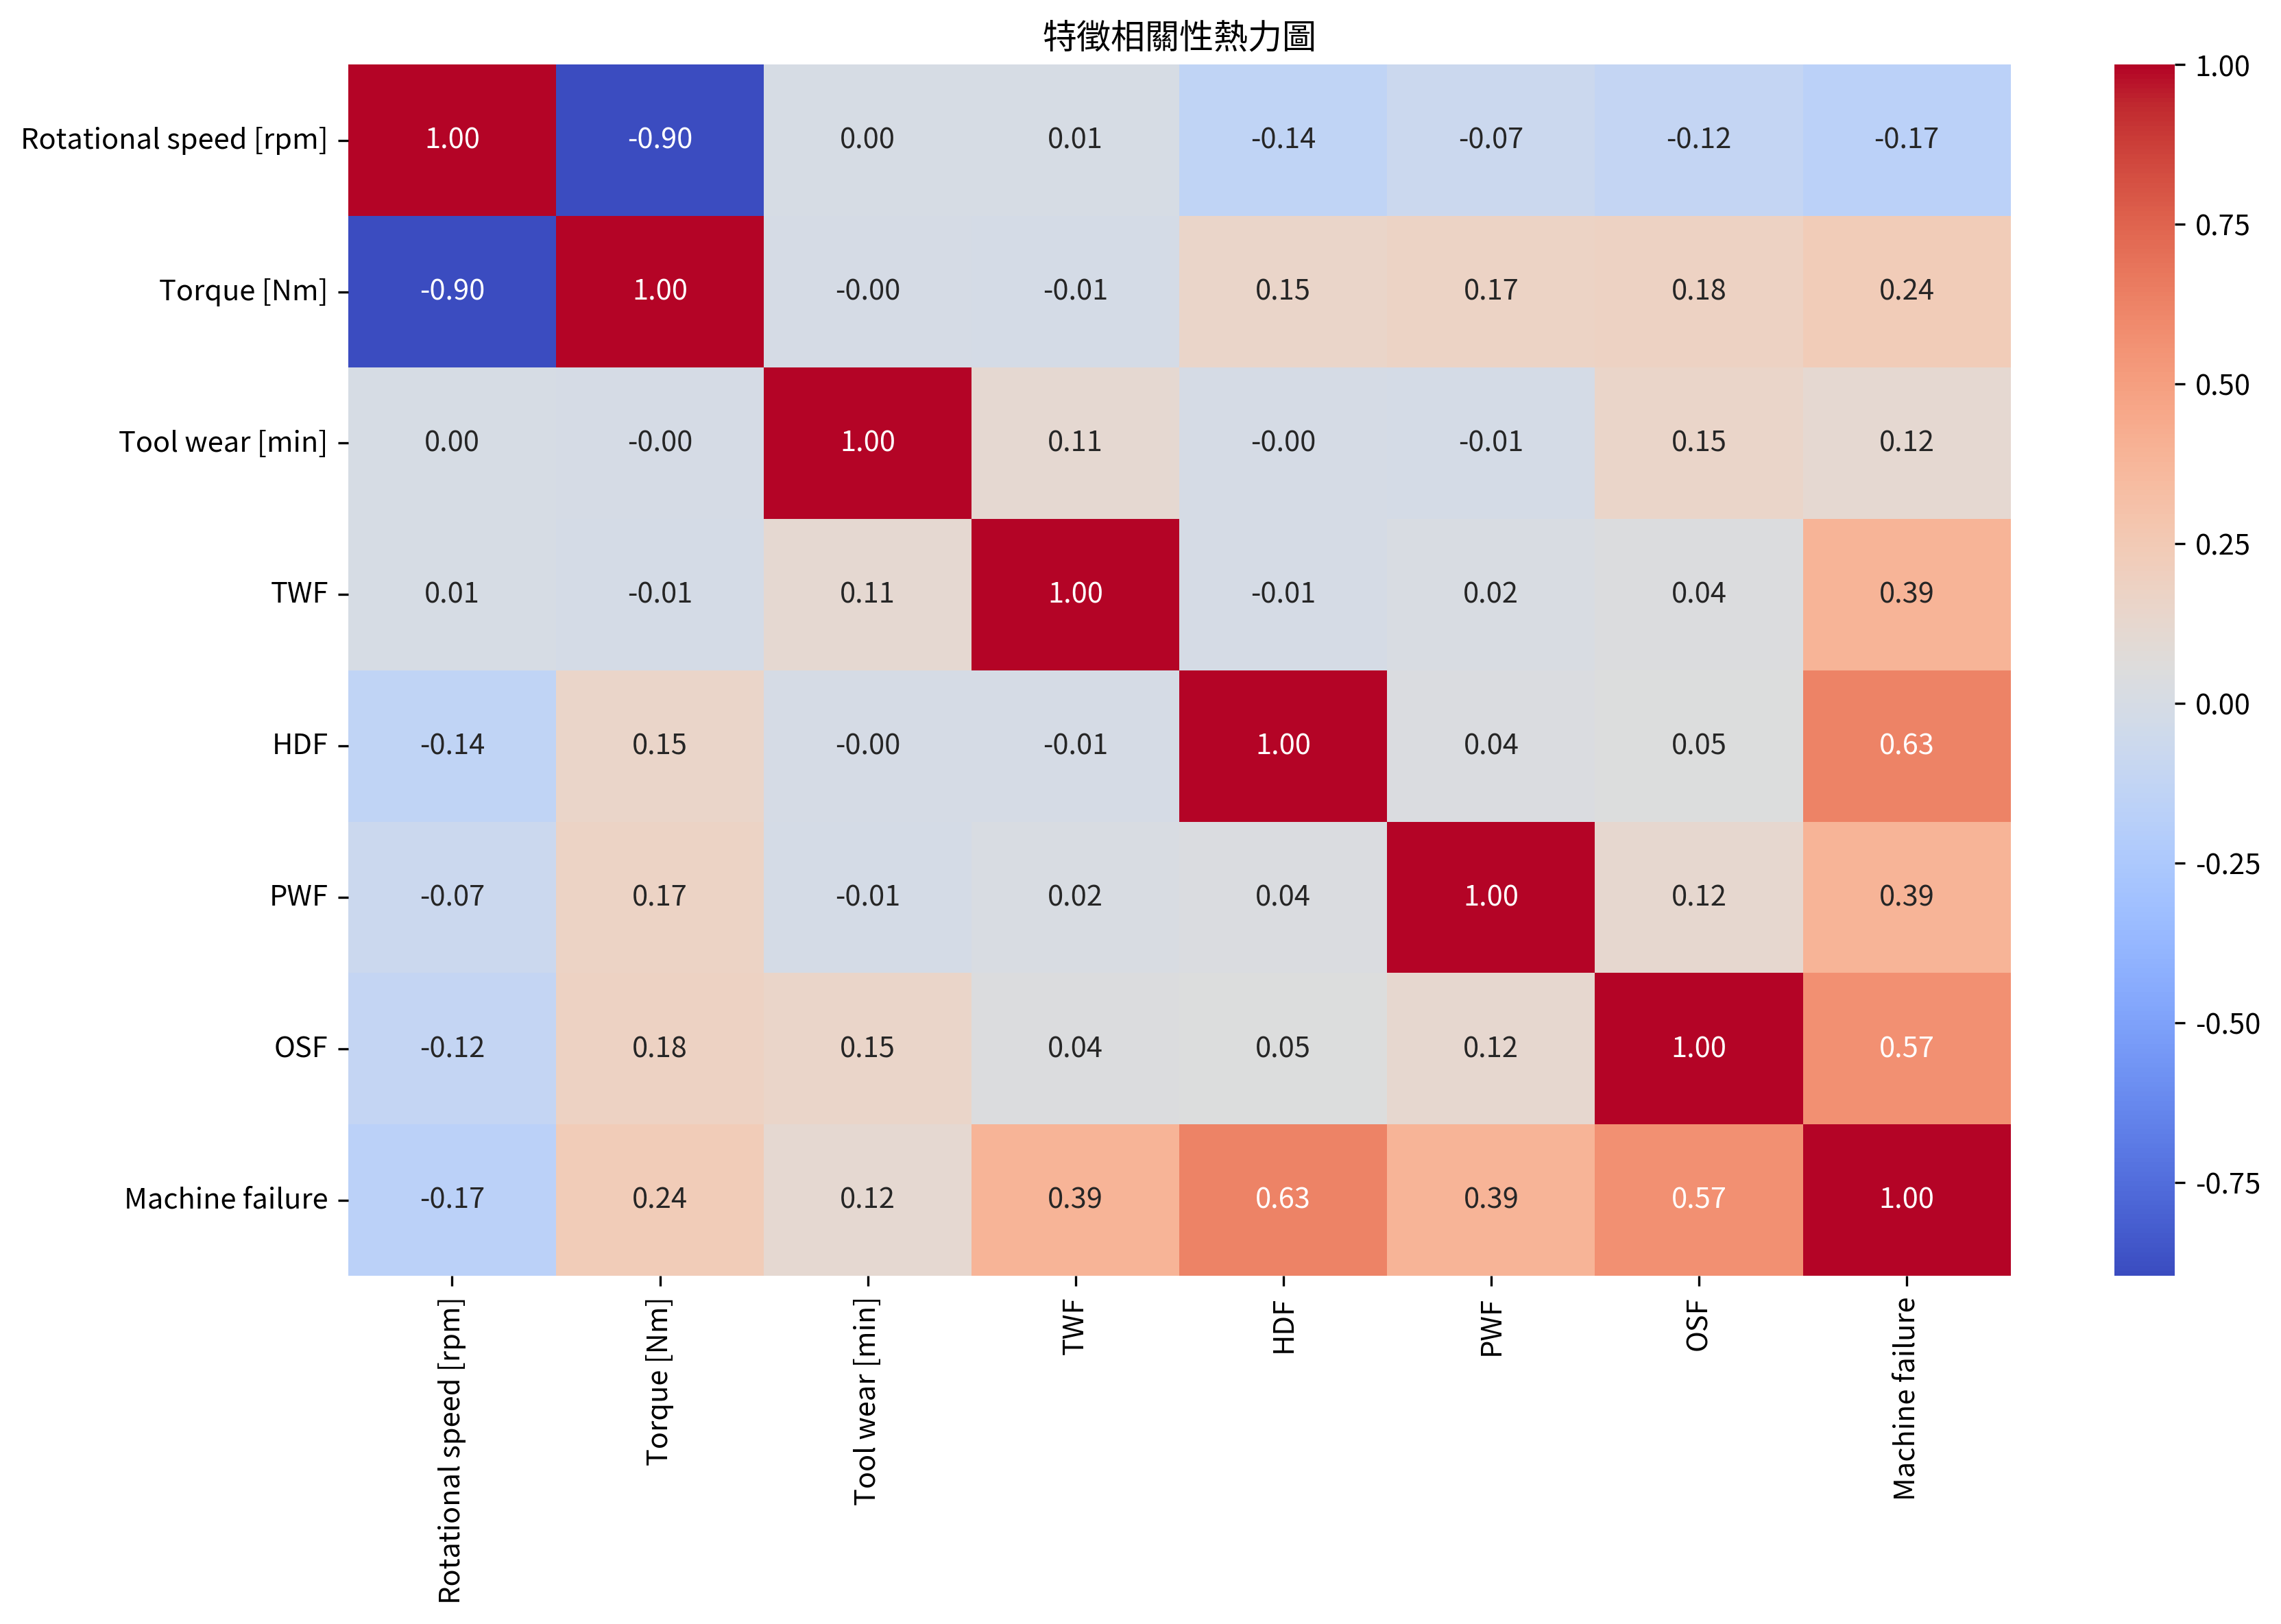

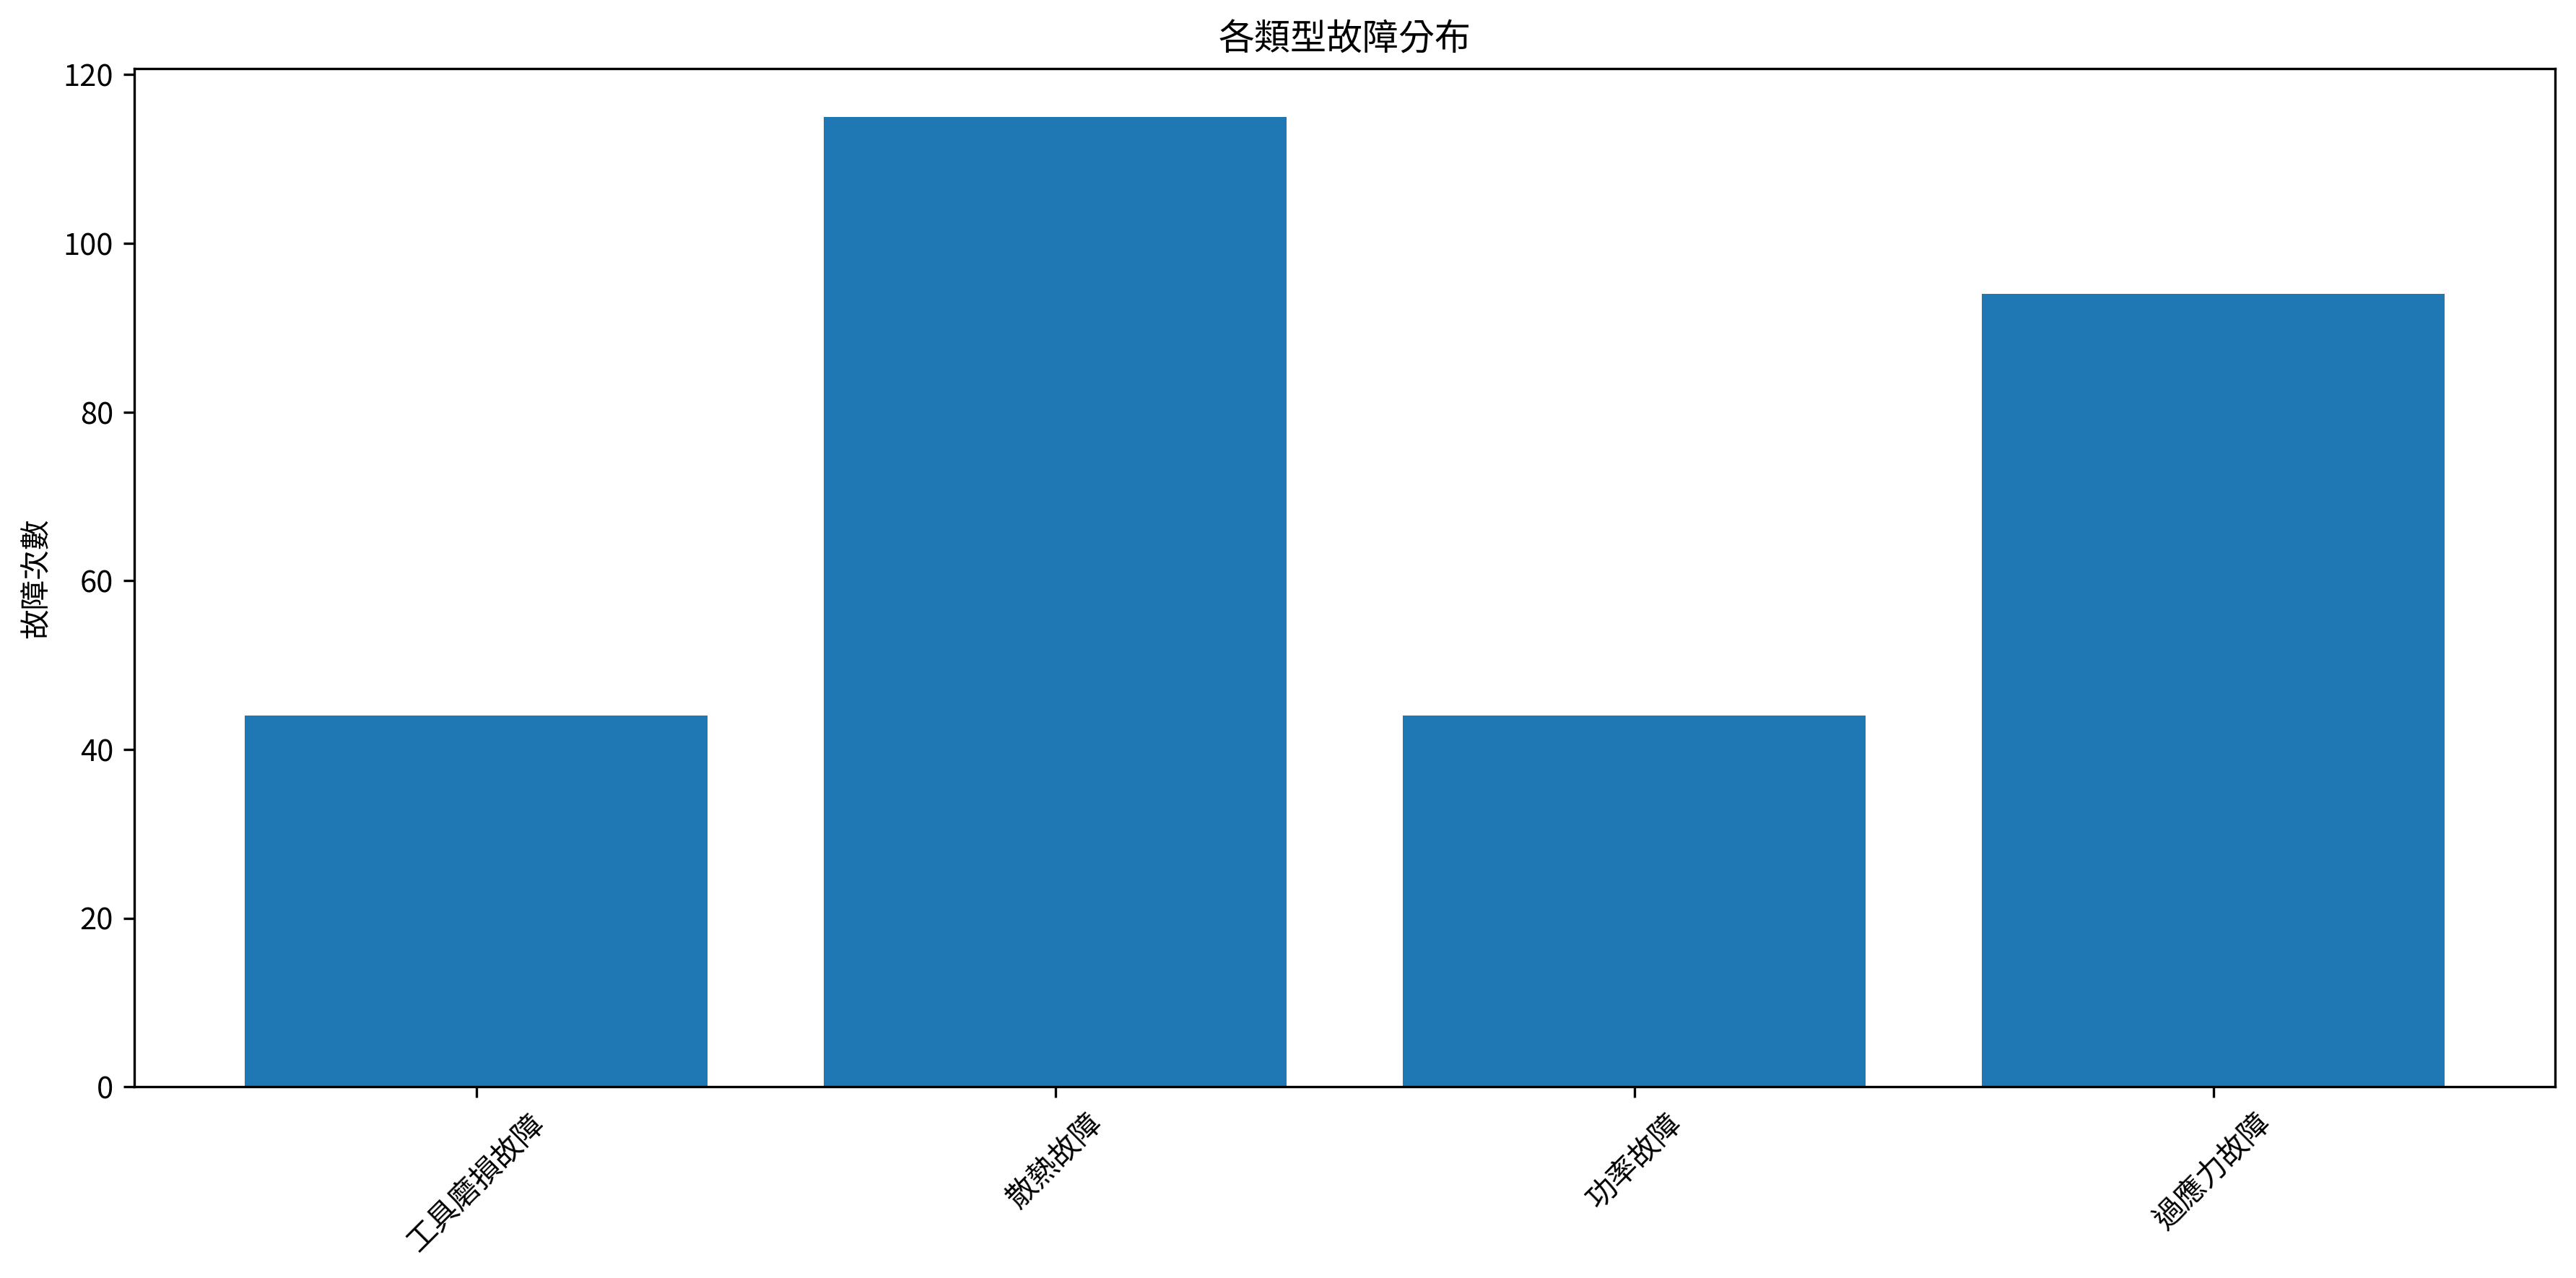

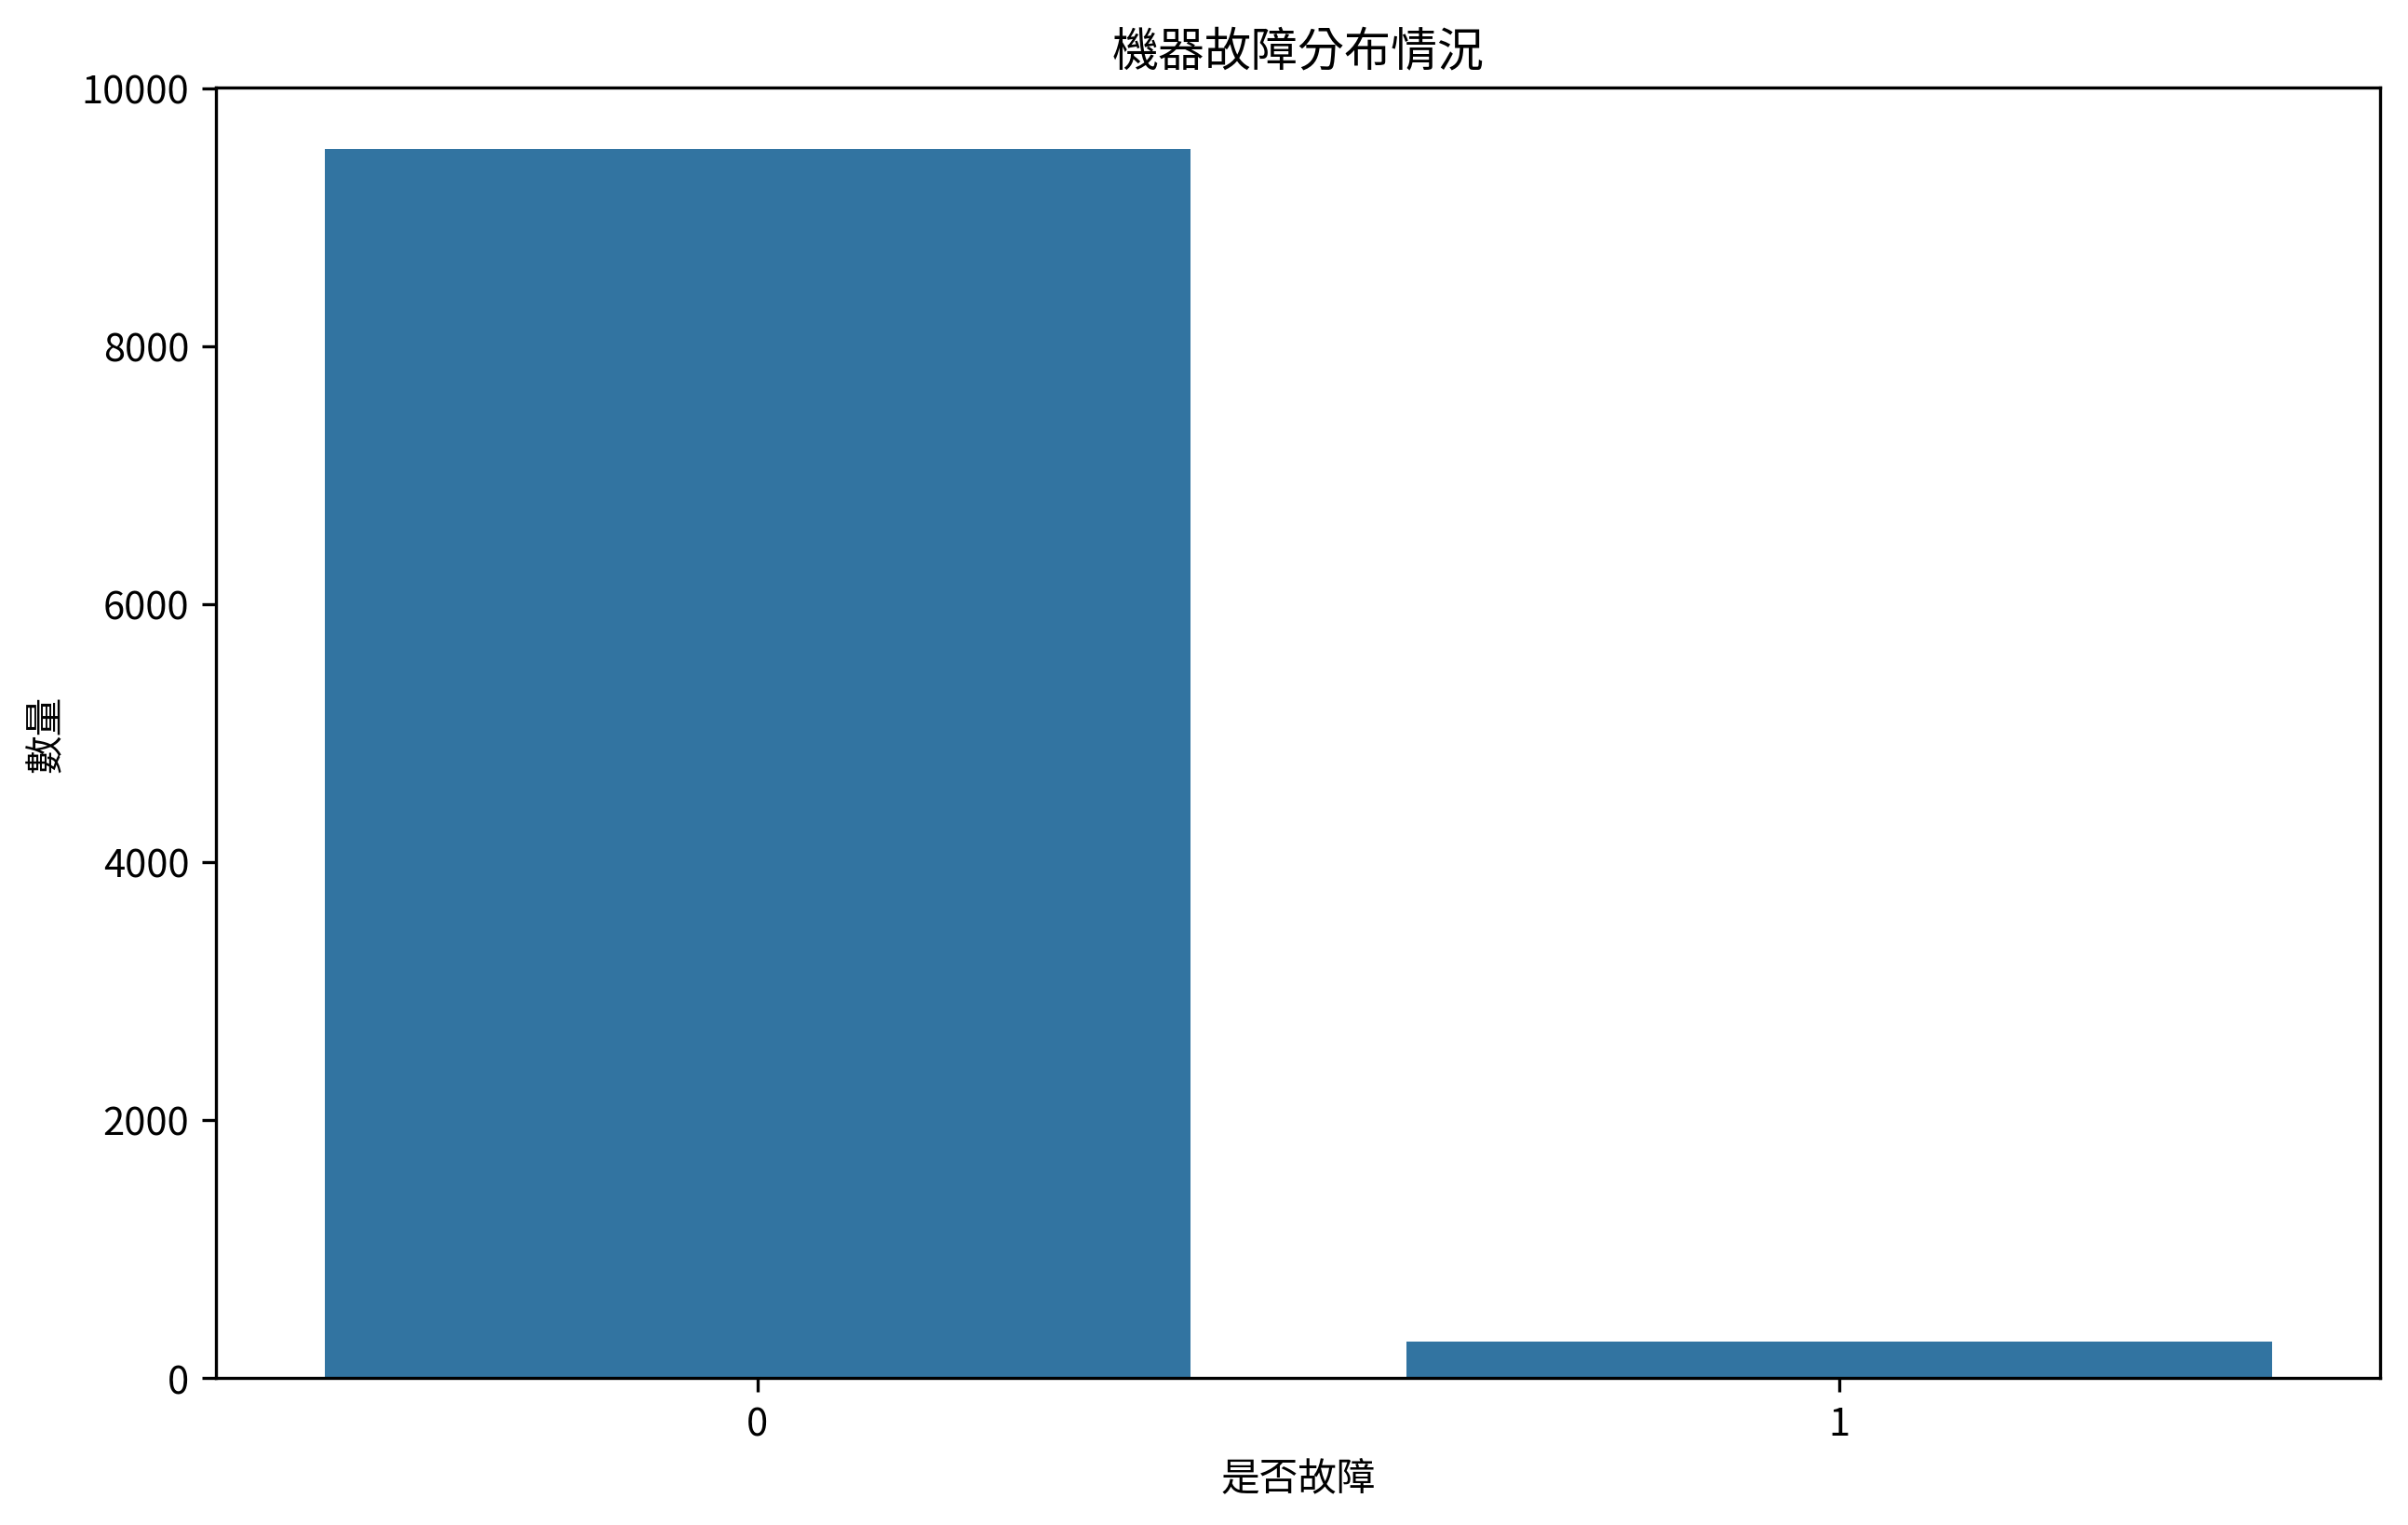

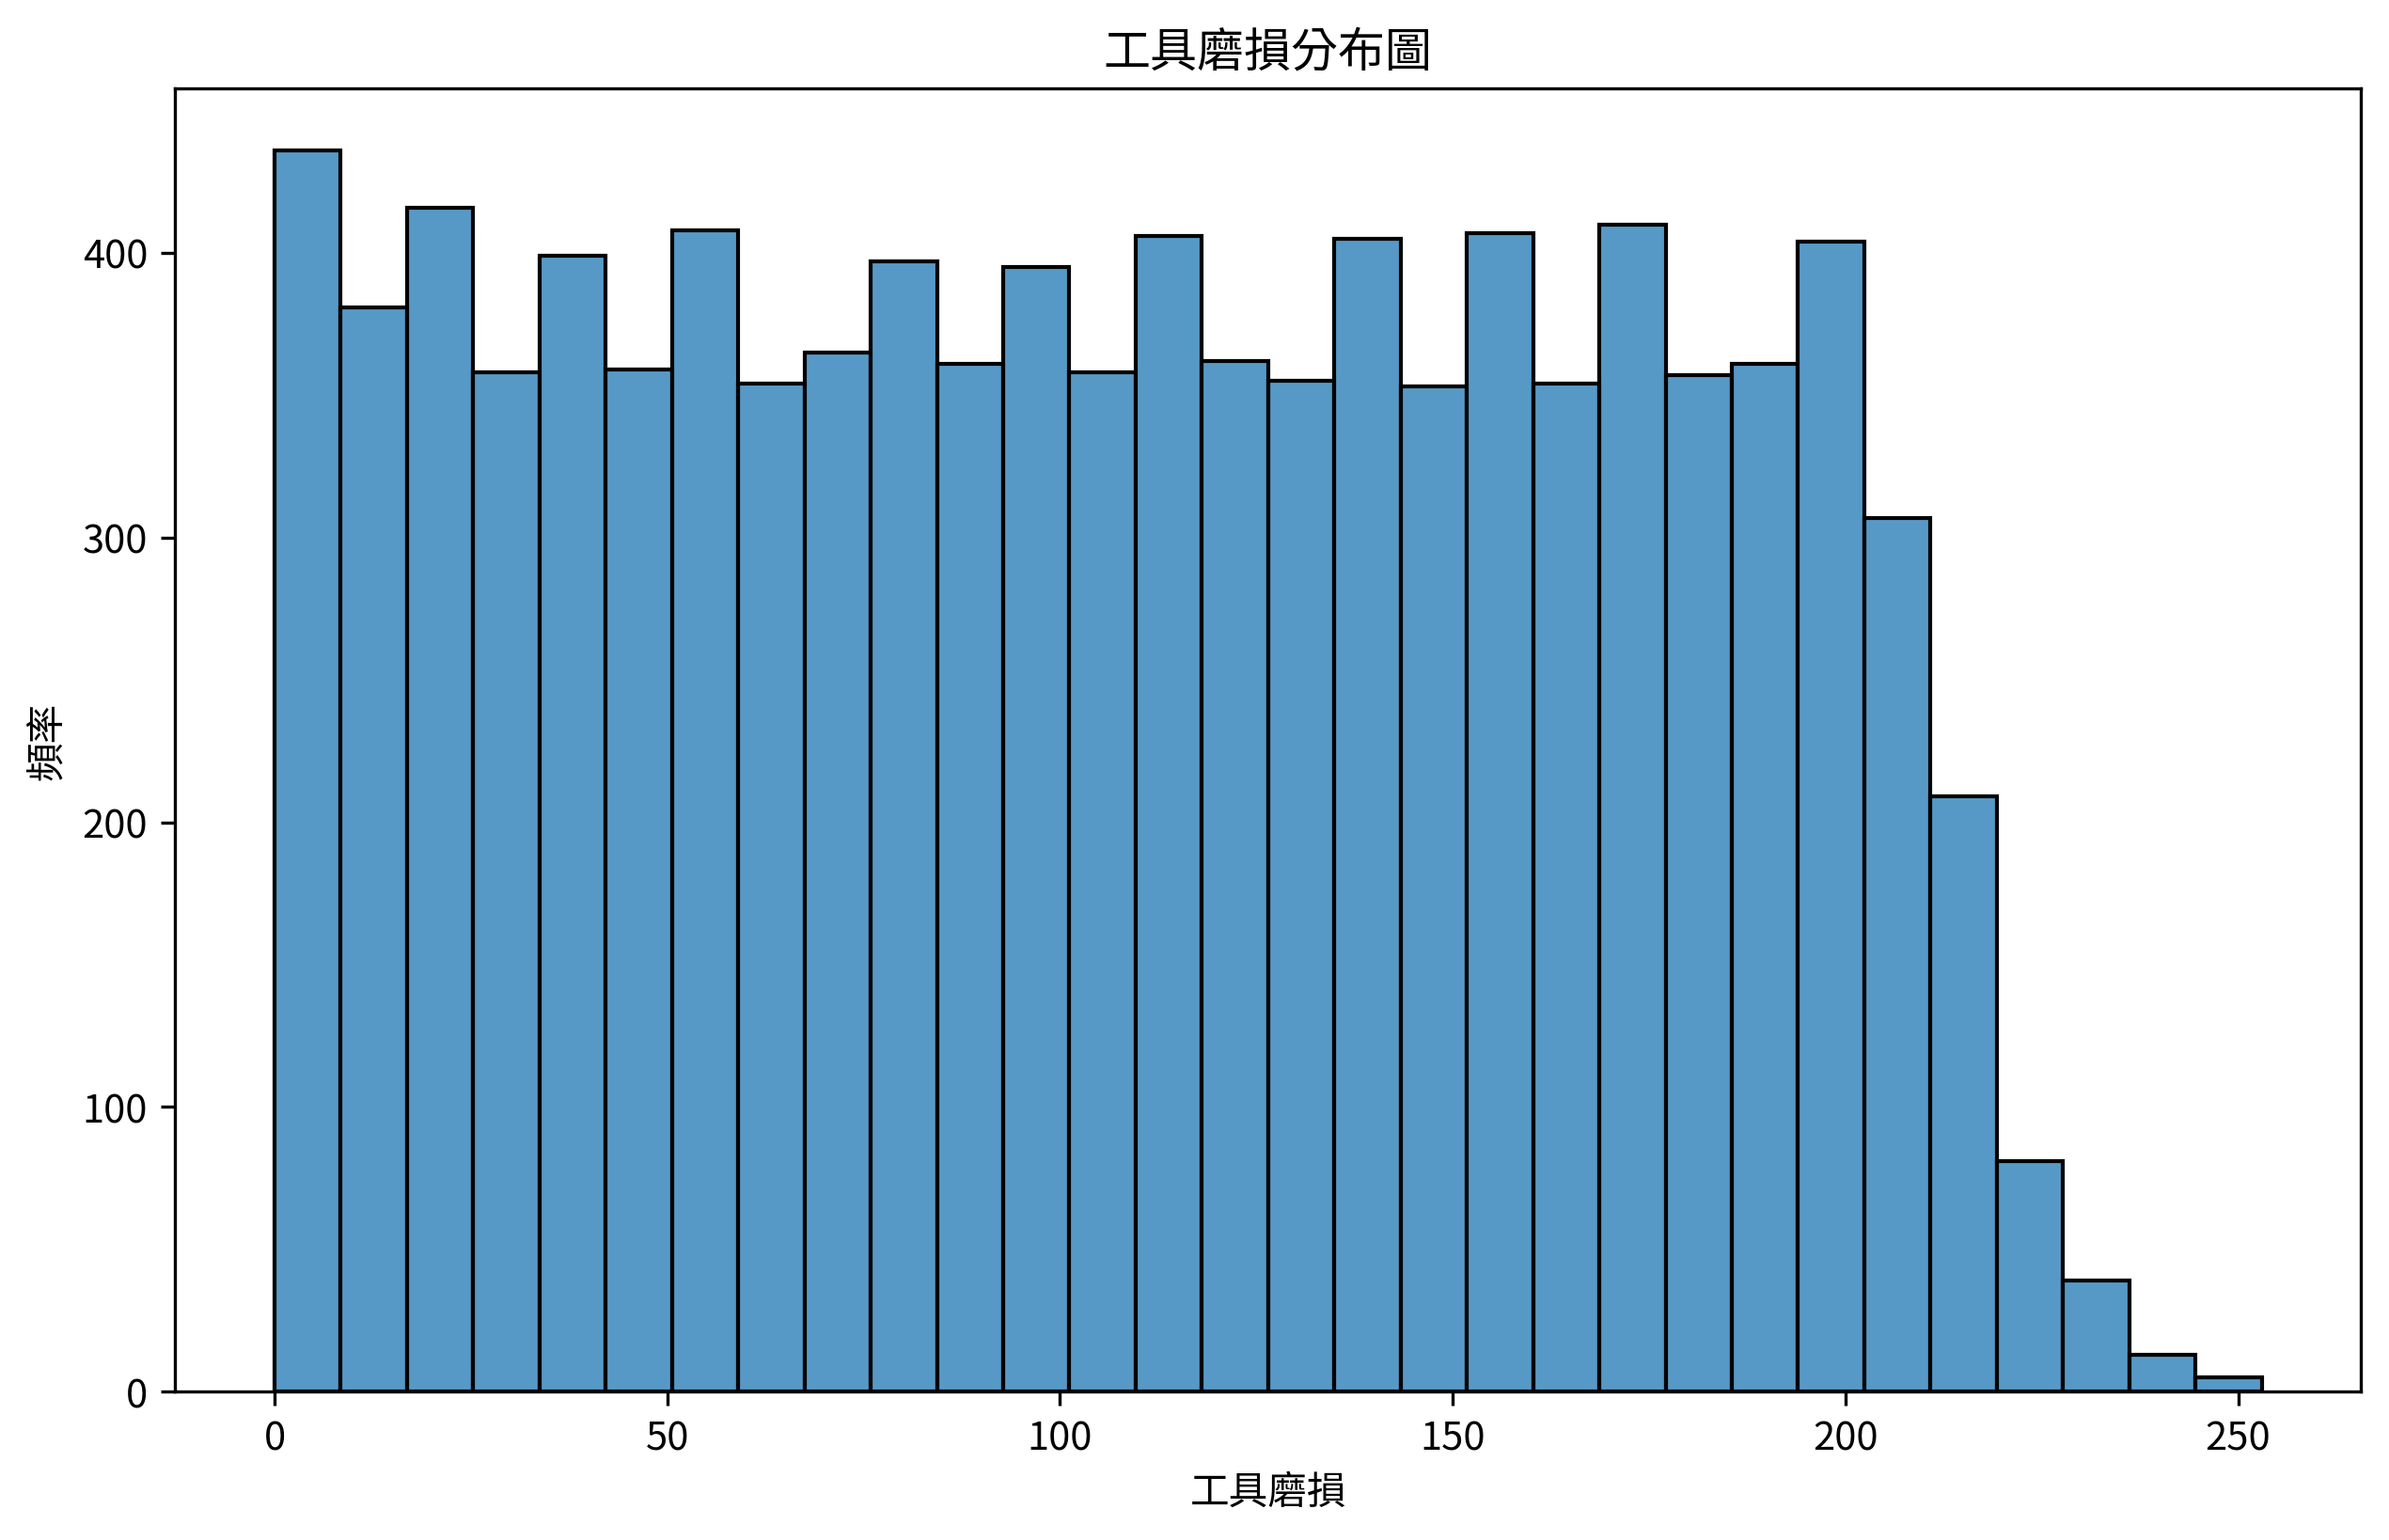

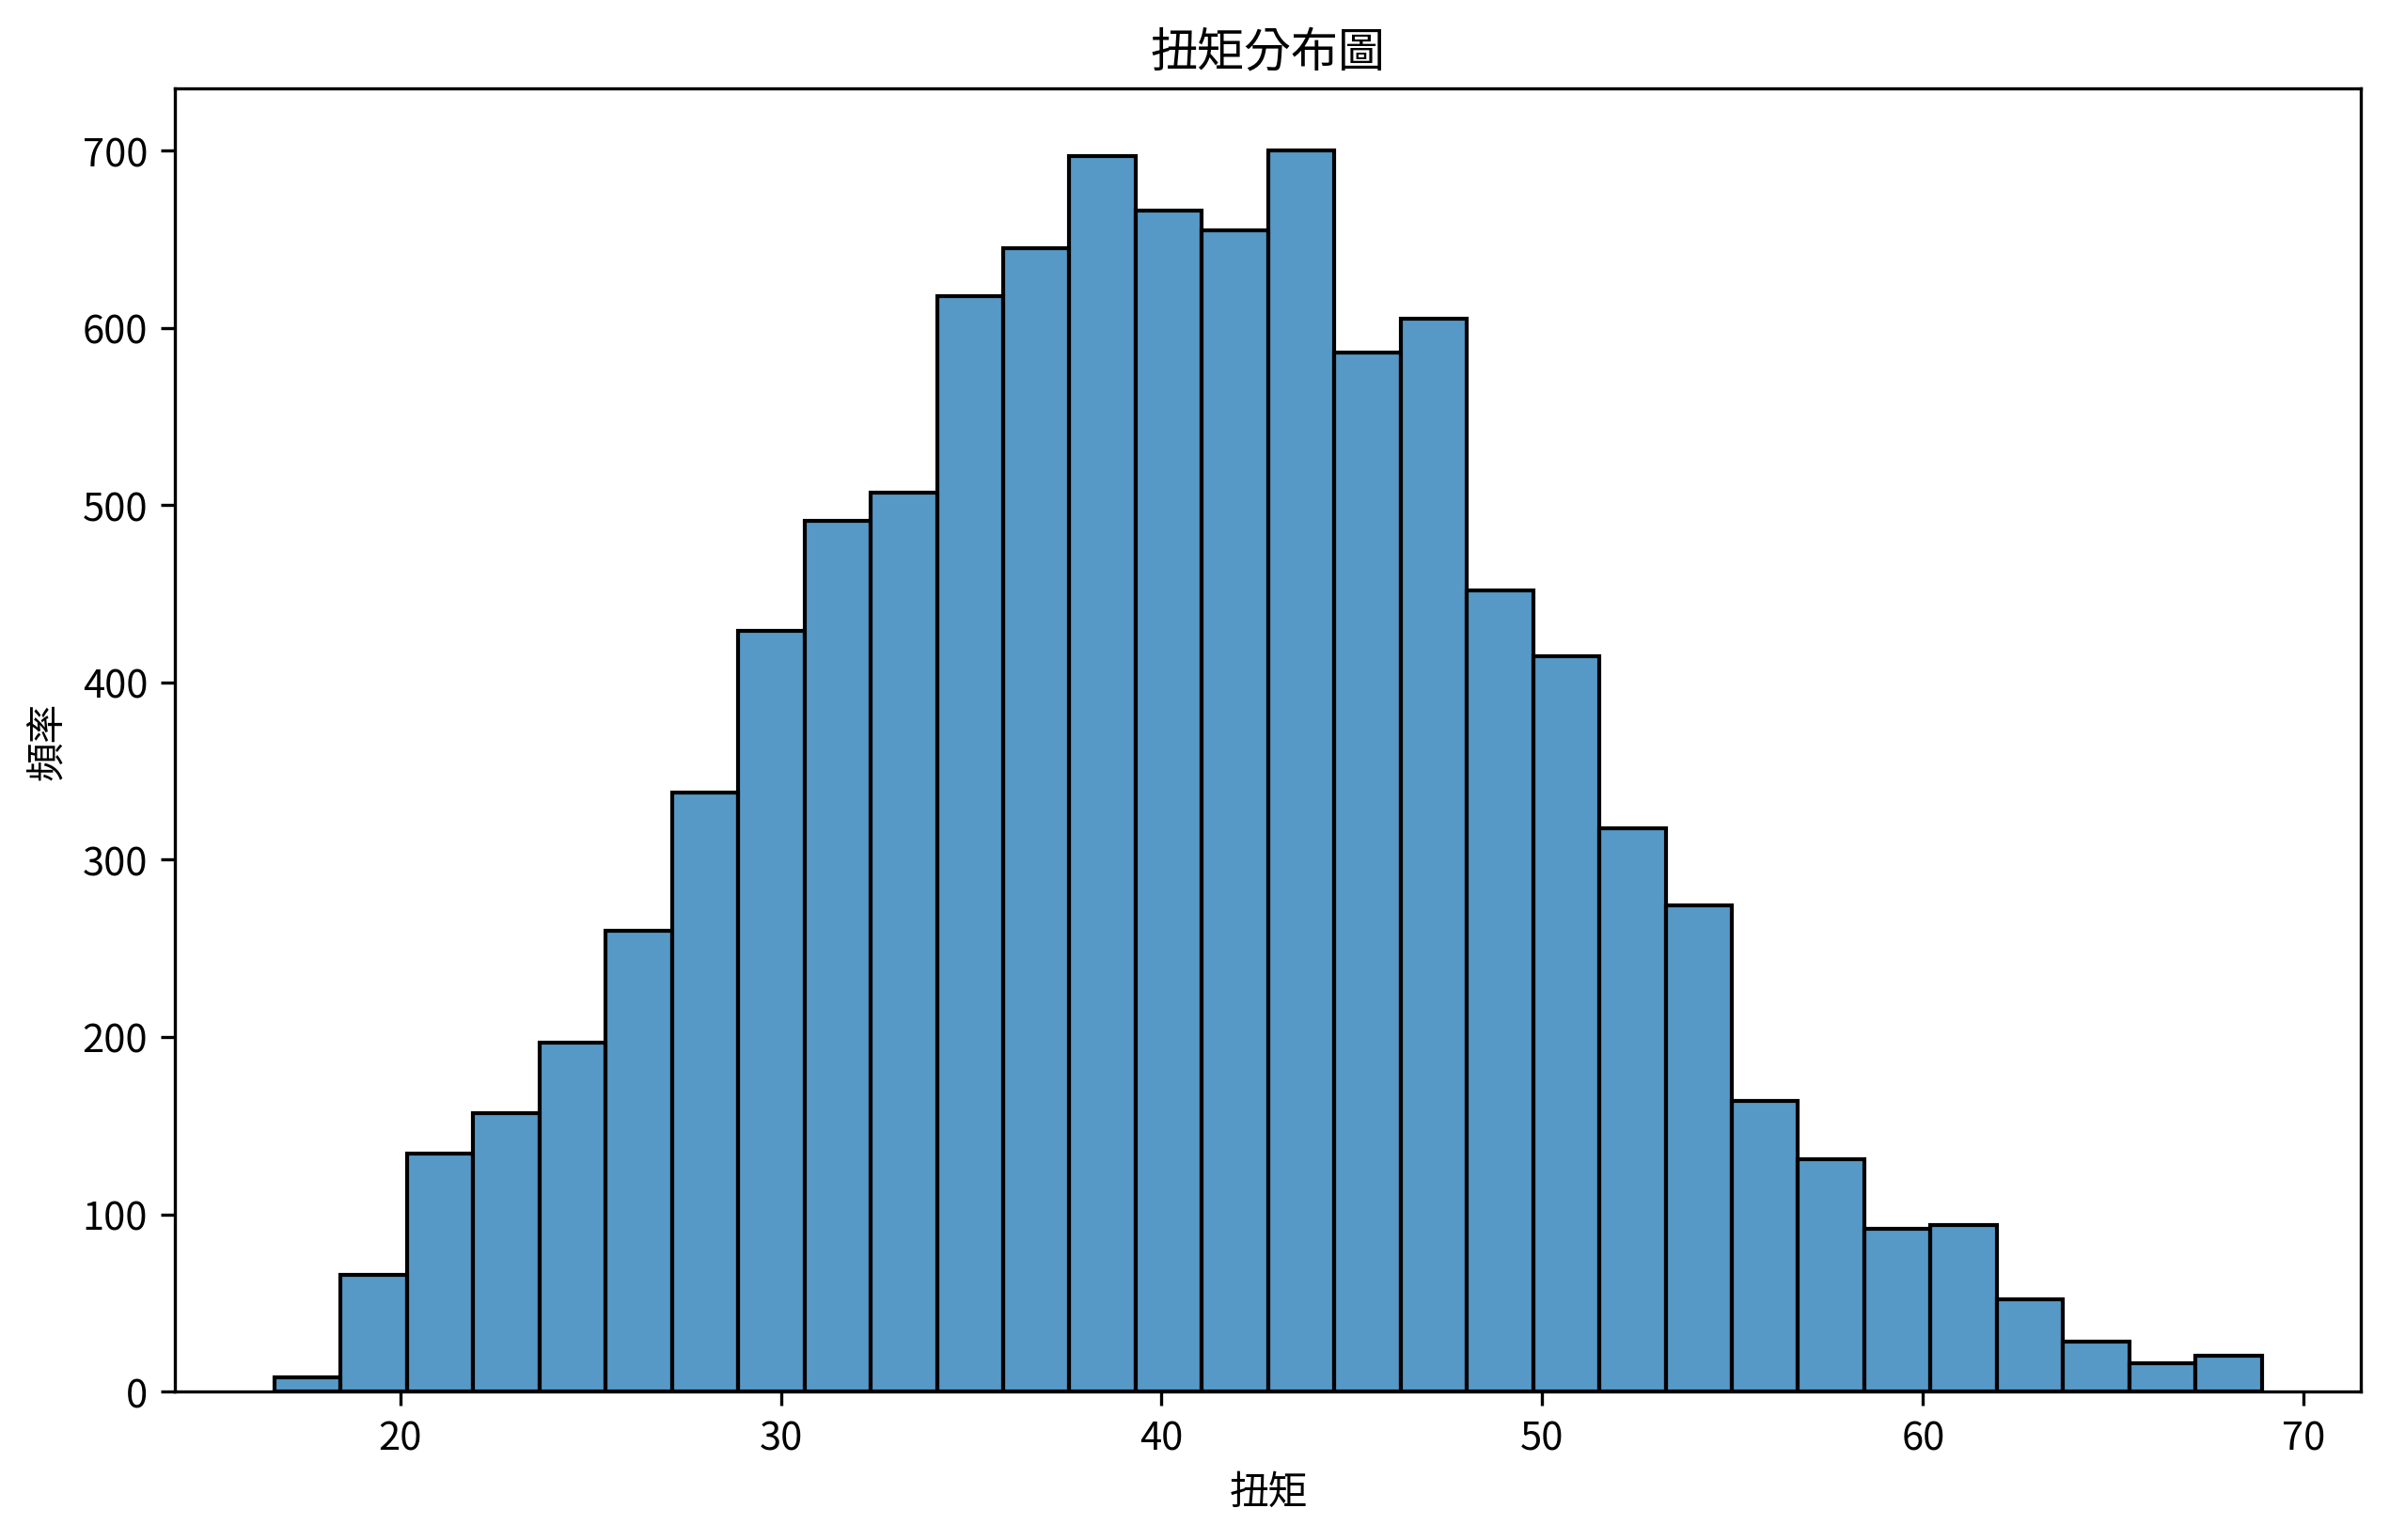

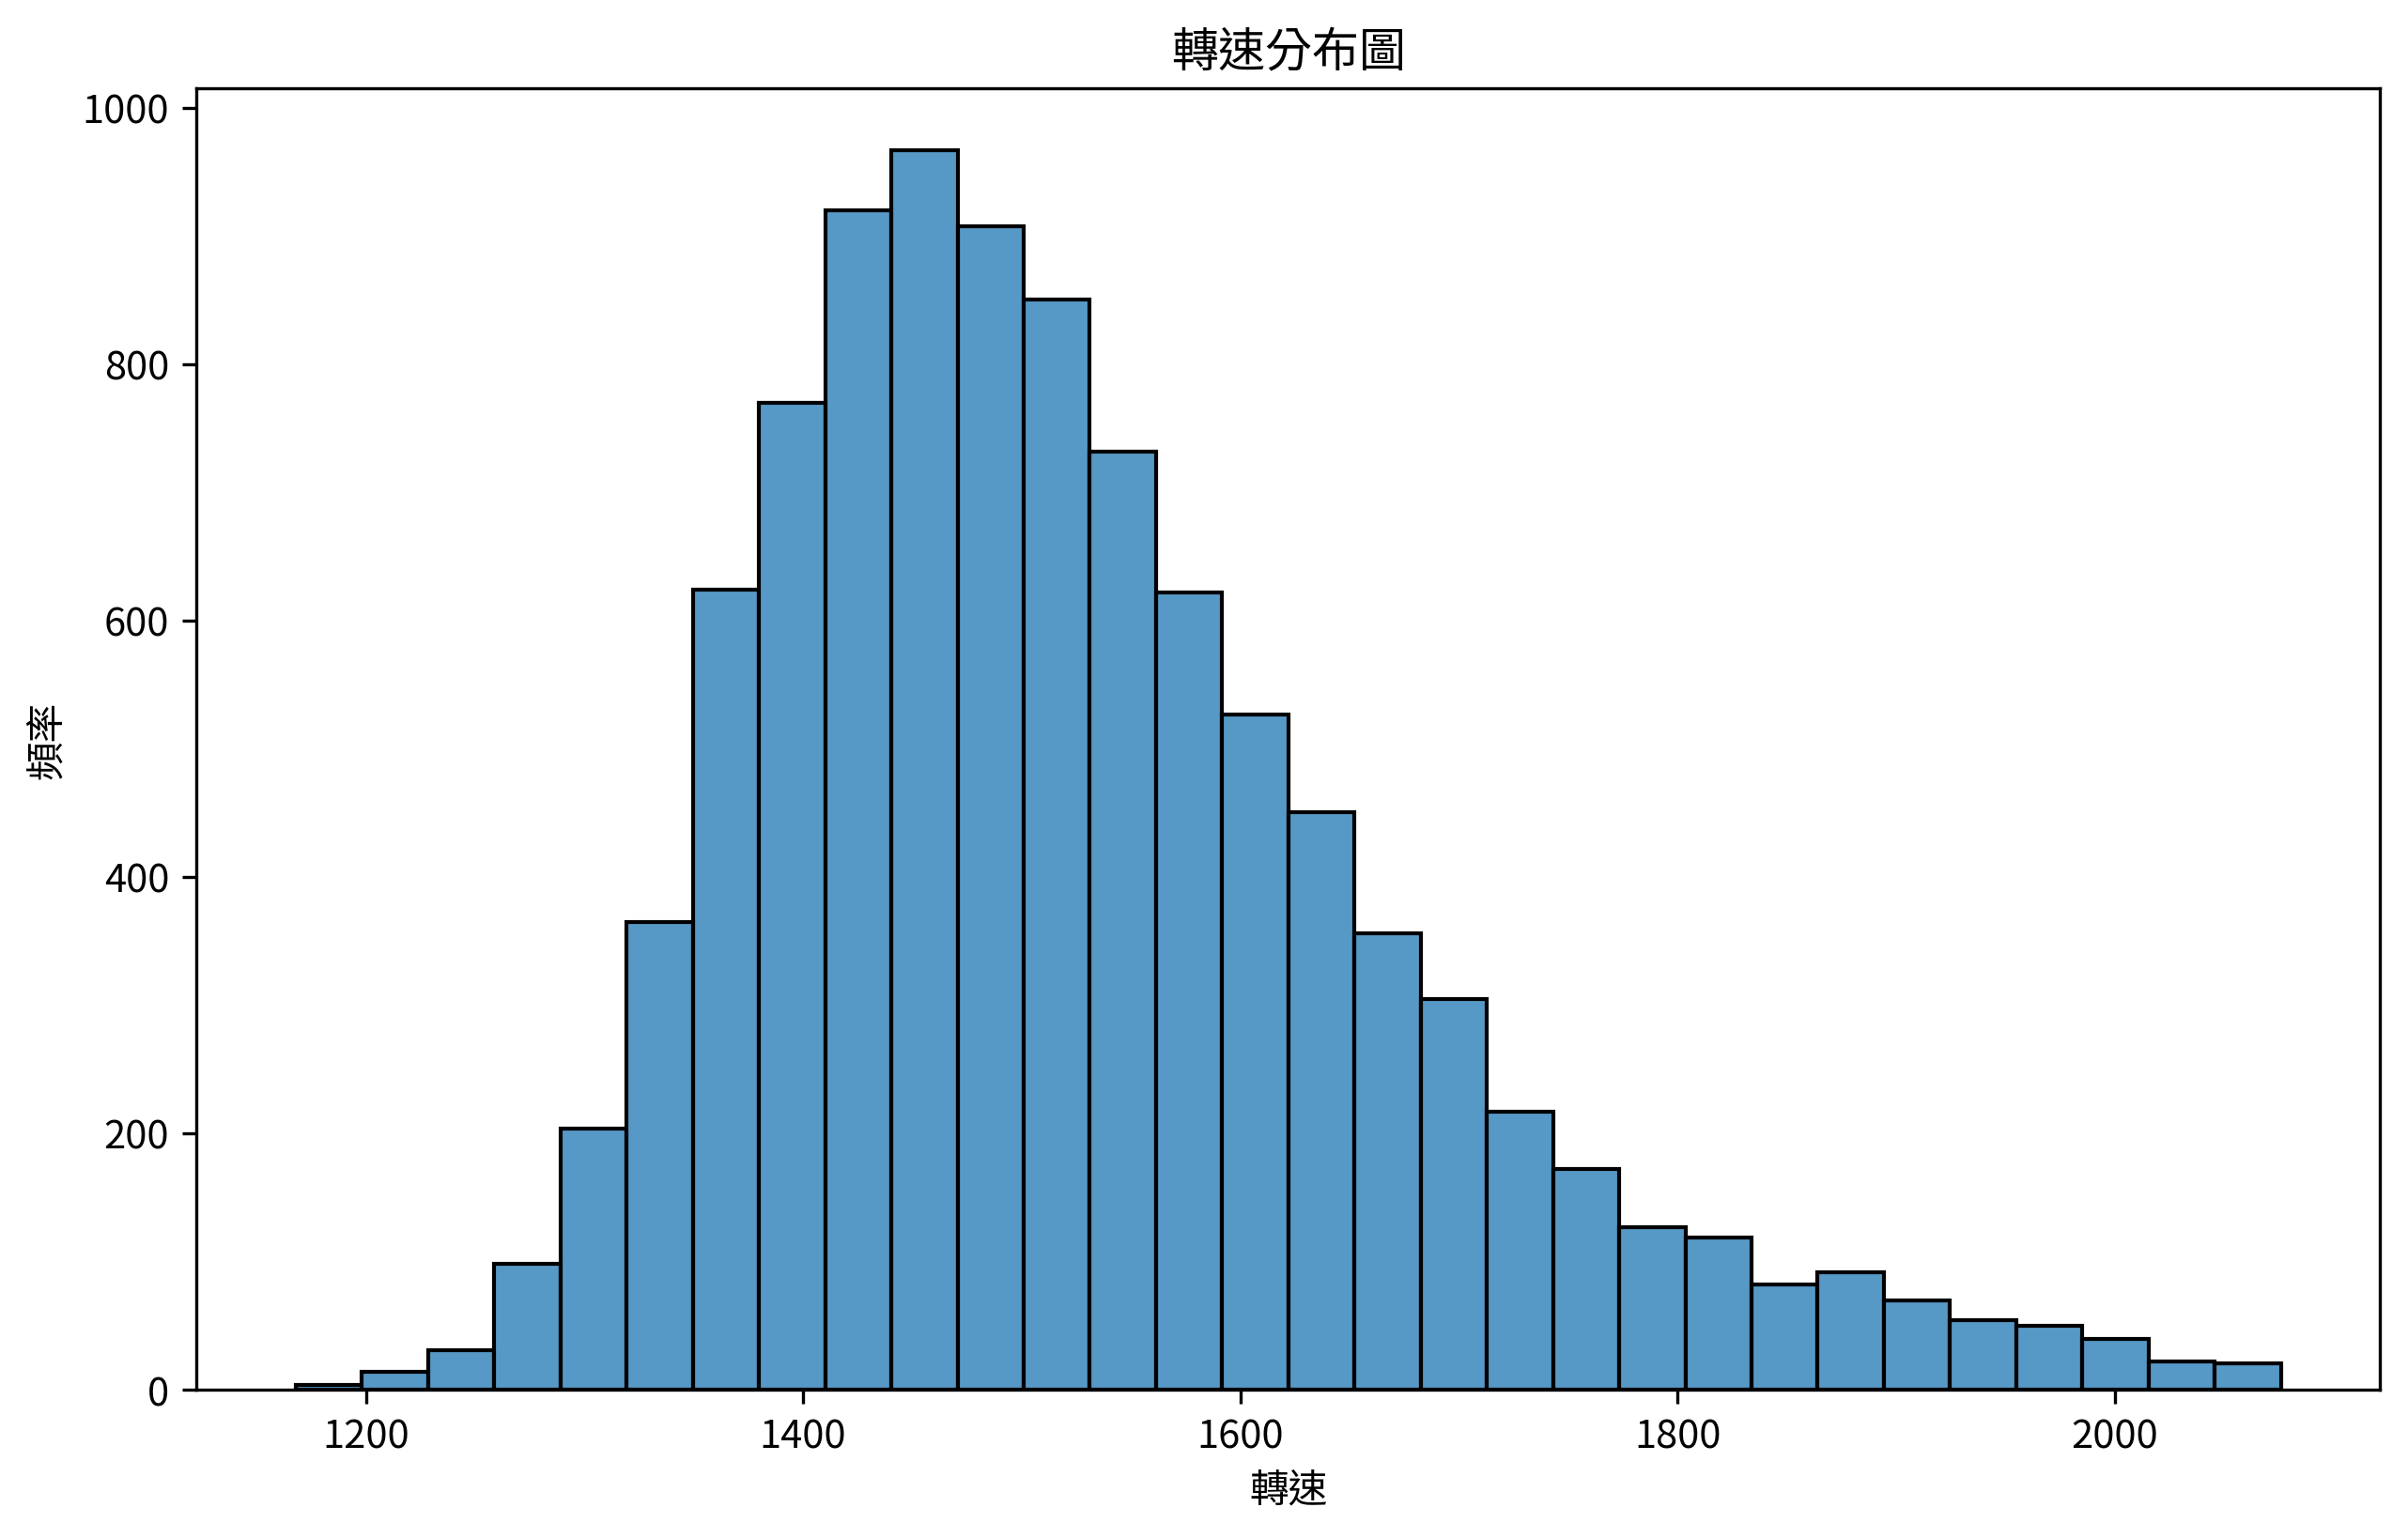

In [ ]:
import os
from IPython.display import Image, display

image_folder = '/content/report_images'

png_files = sorted([
    os.path.join(image_folder, f)
    for f in os.listdir(image_folder)
    if f.lower().endswith('.png')
])

for img_path in png_files:
    display(Image(filename=img_path))


In [ ]:
import shutil
from google.colab import files
shutil.make_archive('/content/report_images', 'zip', '/content/report_images')
files.download('/content/report_images.zip')
files.download('/content/report_content.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>